1. Importing Libraries

In [2]:
#Importing Data and Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Creating path
path = r'/Users/mac/Documents/01-2022 Instacart Basket Analysis'

In [4]:
# Importing merged instacart data
merged_cust = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_cust.csv'), index_col = False)

In [5]:
#Importing departments file as dataframe
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [87]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
#Adding department name to merged instacart dataframe
merged_cust_dept = merged_cust.merge(departments, on = ['department_id'], indicator = False)

In [4]:
crosstab = pd.crosstab(df_merged_cust['days_since_prior_order'], df_merged_cust['order_number'], dropna = False)

In [5]:
crosstab.to_clipboard()

2. Adressing any PII data in the data

In [17]:
# Addressing any PII in the data
merged_cust = df_merged_cust.drop(columns = ['First_name', 'Surname'])

In [19]:
merged_cust.loc[merged_cust['prices'] > 100]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,...,median_days_since_prior_order,Customer_frequency_flag,Gender,State,Age,date_joined,Number_of_dependants,Family_status,income,Region
7805,7805,10030382,10030382,221802,1435153,1519,prior,26,2,11,...,6.0,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Northeast
7806,7806,10030383,10030383,221899,1066435,1519,prior,32,3,10,...,6.0,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Northeast
15143,15143,10030391,10030391,361308,1697208,2409,prior,33,1,19,...,5.0,Frequent customer,Female,Hawaii,55,11/11/2018,2,married,230074,West
20264,20264,29165526,29165526,527948,965345,3531,prior,27,2,19,...,8.0,Frequent customer,Female,Hawaii,80,10/6/2019,2,married,233776,West
20497,20497,10030408,10030408,569513,2943740,3793,prior,1,2,9,...,14.0,Regular customer,Male,Louisiana,59,8/23/2019,3,married,182933,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,32303799,29165639,29165639,8099400,3265389,51346,prior,4,1,17,...,13.0,Regular customer,Male,Rhode Island,58,1/25/2019,1,married,207497,Northeast
32307882,32307882,29165920,29165920,20722995,1179092,131671,prior,12,4,9,...,13.0,Regular customer,Female,Rhode Island,35,8/4/2018,0,single,86490,Northeast
32310810,32310810,29165586,29165586,6224473,1226705,39667,prior,7,2,15,...,23.0,Non-frequent customer,Male,Rhode Island,78,5/8/2019,2,married,195077,Northeast
32330048,32330048,29165778,29165778,15028700,3000037,95105,prior,2,4,19,...,6.0,Frequent customer,Female,South Carolina,48,1/18/2017,2,married,398880,South


In [20]:
merged_cust.loc[merged_cust['prices'] >100, 'prices'] = np.nan

3. Comparing customer behavior in different georgraphical areas

In [8]:
# Checking State list
stateslist = merged_cust['State'].unique()
print(stateslist)

['Alabama' 'Indiana' 'Louisiana' 'Montana' 'Oklahoma' 'Tennessee' 'Iowa'
 'Ohio' 'Virginia' 'Connecticut' 'Kentucky' 'Oregon' 'South Dakota'
 'Michigan' 'New Jersey' 'Arizona' 'Maine' 'Hawaii' 'Minnesota' 'Illinois'
 'Idaho' 'Kansas' 'North Carolina' 'Vermont' 'Alaska' 'Delaware'
 'Maryland' 'Nebraska' 'Nevada' 'Arkansas' 'Georgia'
 'District of Columbia' 'Utah' 'Colorado' 'Florida' 'South Carolina'
 'Rhode Island' 'Washington' 'California' 'Mississippi' 'Texas'
 'New Mexico' 'Missouri' 'Wyoming' 'New Hampshire' 'Massachusetts'
 'Pennsylvania' 'Wisconsin' 'West Virginia' 'North Dakota' 'New York']


In [23]:
#Creating Region lists
Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','New Jersey','Pennsylvania']
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [24]:
# Adding regions column
cond=[merged_cust['State'].isin(Northeast),merged_cust['State'].isin(Midwest),merged_cust['State'].isin(South),merged_cust['State'].isin(West)]
values=['Northeast','Midwest','South','West']
merged_cust['Region']=np.select(cond,values)

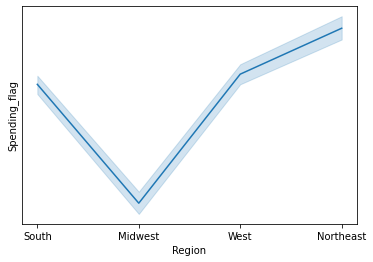

In [21]:
# Determining connection between Region and Spending flag
line_5 = sns.lineplot(data = merged_cust, x = 'Region',y = 'Spending_flag')

In [23]:
# Creating crosstab between region and spending flag
crosstab = pd.crosstab(merged_cust['Region'], merged_cust['Spending_flag'], dropna = False)

In [24]:
crosstab.to_clipboard()

4. Creating exclusion flag for low activity customers 

In [25]:
#Checking the dataframe columns output
pd.set_option('display.max_columns', None)
merged_cust.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price,Spending_flag,median_days_since_prior_order,Customer_frequency_flag,Gender,State,Age,date_joined,Number_of_dependants,Family_status,income,Region
0,0,0,0,0,2539329,1,prior,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,10,New customer,6.367797,Low Spenders,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,1,1,1,5,2398795,1,prior,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,10,New customer,6.367797,Low Spenders,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2,2,2,11,473747,1,prior,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,10,New customer,6.367797,Low Spenders,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,3,3,3,16,2254736,1,prior,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,10,New customer,6.367797,Low Spenders,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,4,4,4,21,431534,1,prior,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,10,New customer,6.367797,Low Spenders,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [30]:
#Creating activity flag - low activity customers
merged_cust.loc[merged_cust['max_order'] < 5, 'customer_activity_flag'] = 'Low activity customer'

In [31]:
#Creating activity flag - high activity customers
merged_cust.loc[merged_cust['max_order'] >= 5, 'customer_activity_flag'] = 'High activity customer'

In [32]:
#Cheecking the count
merged_cust['customer_activity_flag'].value_counts(dropna = False)

High activity customer    30964564
Low activity customer      1440295
Name: customer_activity_flag, dtype: int64

In [29]:
#Exporting data
merged_cust.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_cust_activity_flag.csv'))

5. Creating Profiling variables

In [34]:
#Create age range
merged_cust.loc[(merged_cust['Age'] >= 18) & (merged_cust['Age'] <= 24), 'Age_group'] = '18-24'
merged_cust.loc[(merged_cust['Age'] >= 25) & (merged_cust['Age'] <= 40), 'Age_group'] = '25-40'
merged_cust.loc[(merged_cust['Age'] >= 41) & (merged_cust['Age'] <= 56), 'Age_group'] = '41-56'
merged_cust.loc[(merged_cust['Age'] >= 57) & (merged_cust['Age'] <= 75), 'Age_group'] = '57-75'
merged_cust.loc[merged_cust['Age'] > 75, 'Age_group'] = 'over_75'

In [35]:
#Create age range
merged_cust.loc[(merged_cust['income'] >= 0) & (merged_cust['income'] < 50000), 'Income_group'] = '0-50000'
merged_cust.loc[(merged_cust['income'] >= 50000) & (merged_cust['income'] < 75000), 'Income_group'] = '50000-75000'
merged_cust.loc[(merged_cust['income'] >= 75000) & (merged_cust['income'] < 100000), 'Income_group'] = '75000-100000'
merged_cust.loc[(merged_cust['income'] >= 100000) & (merged_cust['income'] <= 150000), 'Income_group'] = '100000-150000'
merged_cust.loc[merged_cust['income'] > 150000, 'Income_group'] = 'over_150000'

In [36]:
#Ascertaining unique user_ids 
userlist = merged_cust['user_id'].unique()
userlist.sort()
print(userlist)

[     1      2      3 ... 206207 206208 206209]


In [37]:
#Count of age group by user
merged_cust.groupby('Age_group')['user_id'].nunique()

Age_group
18-24      22560
25-40      51404
41-56      51983
57-75      60821
over_75    19441
Name: user_id, dtype: int64

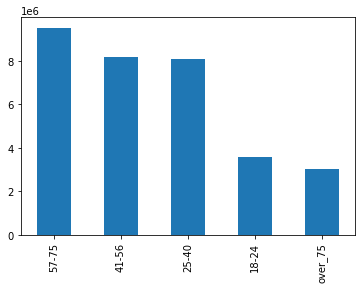

In [40]:
# Visualization of user by age group
Age_group_bar = merged_cust['Age_group'].value_counts().plot.bar()
Age_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_group_bar.png'))

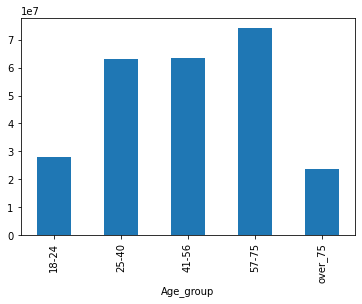

In [41]:
# Visualization of prices by age group
Age_group_prices_bar = merged_cust.groupby(['Age_group'])['prices'].agg('sum').plot.bar()
Age_group_prices_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Prices_age_group_bar.png'))

In [42]:
#Count of Income group by user
merged_cust.groupby('Income_group')['user_id'].nunique()

Income_group
0-50000          34105
100000-150000    64007
50000-75000      42749
75000-100000     42097
over_150000      23251
Name: user_id, dtype: int64

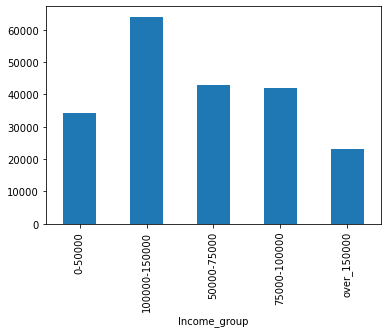

In [43]:
# Visulization of unique users by Income group
Income_group_bar = merged_cust.groupby('Income_group')['user_id'].nunique().plot.bar()
Income_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income_group_bar.png'))

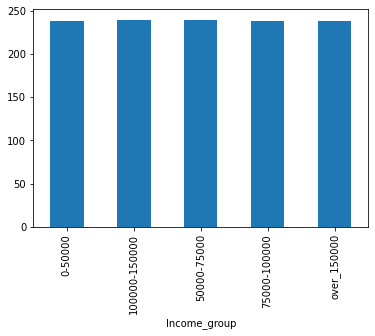

In [44]:
# Visulization of unique users by sales
Income_sales_bar = merged_cust.groupby('Income_group')['prices'].nunique().plot.bar()
Income_sales_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income_sales_bar.png'))

In [45]:
#Count of Income group by sales
merged_cust.groupby('Income_group')['prices'].nunique()

Income_group
0-50000          239
100000-150000    240
50000-75000      240
75000-100000     239
over_150000      238
Name: prices, dtype: int64

In [46]:
# Identifying family status
merged_cust.groupby('Family_status')['user_id'].nunique()

Family_status
divorced/widowed                     17640
living with parents and siblings      9701
married                             144906
single                               33962
Name: user_id, dtype: int64

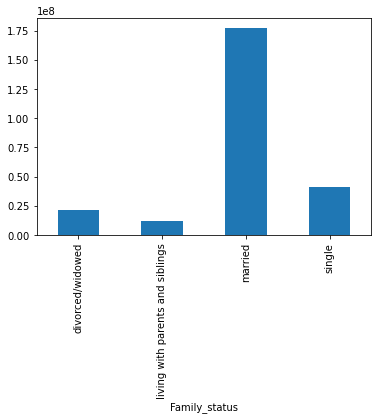

In [48]:
#Visualization of sales by family status
Family_status_bar = merged_cust.groupby('Family_status')['prices'].agg('sum').plot.bar()
Family_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Family_status_bar.png'))

In [51]:
#Creating customer profiles

merged_cust.loc[(merged_cust['Family_status'] == 'single') & (merged_cust['Number_of_dependants'] == 0 ), 'Customer_profile'] = 'Single with no dependants'
merged_cust.loc[(merged_cust['Family_status'] == 'single') & (merged_cust['Number_of_dependants'] >=1 ), 'Customer_profile'] = 'Single with dependants'

merged_cust.loc[(merged_cust['Age'] <= 40) & (merged_cust['Number_of_dependants'] >=1 ), 'Customer_profile'] = 'Young parent' 
merged_cust.loc[(merged_cust['Age'] > 40) & (merged_cust['Number_of_dependants'] >=1 ), 'Customer_profile'] = 'Older parent'

merged_cust.loc[(merged_cust['Age'] >= 57) & (merged_cust['Age'] <= 75), 'Customer_profile'] = 'Early retiree'
merged_cust.loc[merged_cust['Age'] > 75, 'Customer_profile'] = 'Older retiree'

merged_cust.loc[merged_cust['income'] > 150000, 'Customer_profile'] = 'High earner >150k'

merged_cust.loc[(merged_cust['Family_status'] == 'married') & (merged_cust['Number_of_dependants'] >=1 ) & (merged_cust['income'] >= 0) & (merged_cust['income'] < 75000), 'Customer_profile'] = 'Married,low,middle income with dependants'
merged_cust.loc[(merged_cust['Family_status'] == 'married') & (merged_cust['Number_of_dependants'] >=1 ) & (merged_cust['income'] >= 75000) & (merged_cust['income'] < 150000), 'Customer_profile'] = 'Married, middle,high income with dependnats'
merged_cust.loc[(merged_cust['Family_status'] == 'married') & (merged_cust['Number_of_dependants'] >=1 ) & (merged_cust['income'] > 150000), 'Customer_profile'] = 'Married, high income with dep'

merged_cust.loc[(merged_cust['Family_status'] == 'married') & (merged_cust['Number_of_dependants'] == 0 ) & (merged_cust['income'] >= 0) & (merged_cust['income'] < 75000), 'Customer_profile'] = 'Married,low,middle income no dependants'
merged_cust.loc[(merged_cust['Family_status'] == 'married') & (merged_cust['Number_of_dependants'] == 0 ) & (merged_cust['income'] >= 75000) & (merged_cust['income'] < 150000), 'Customer_profile'] = 'Married,middle,high income no dependants'
merged_cust.loc[(merged_cust['Family_status'] == 'married') & (merged_cust['Number_of_dependants'] == 0 ) & (merged_cust['income'] > 150000), 'Customer_profile'] = 'Married,high income no dependants'

In [52]:
# Customer profile Count
merged_cust.groupby('Customer_profile')['user_id'].nunique().sort_values(ascending=False)

Customer_profile
Married, middle,high income with dependnats    76209
Married,low,middle income with dependants      51323
Single with no dependants                      29162
Married, high income with dep                  17372
Early retiree                                  12589
Young parent                                    9652
High earner >150k                               5879
Older retiree                                   4021
Older parent                                       2
Name: user_id, dtype: int64

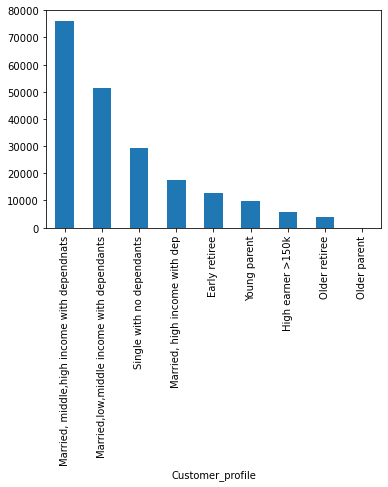

In [54]:
# Visualization of customer profile
Customer_profile_bar = merged_cust.groupby('Customer_profile')['user_id'].nunique().sort_values(ascending=False).plot.bar()
Customer_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer_profile_bar.png'))

In [55]:
# Revenue by Customer profile
round(merged_cust.groupby(['Customer_profile'])['prices'].agg('sum').sort_values(ascending=False),0)

Customer_profile
Married, middle,high income with dependnats    102393549.0
Married,low,middle income with dependants       51029707.0
Single with no dependants                       34980366.0
Married, high income with dep                   23837260.0
Early retiree                                   15055375.0
Young parent                                    11974598.0
High earner >150k                                8324133.0
Older retiree                                    4829544.0
Older parent                                        1589.0
Name: prices, dtype: float64

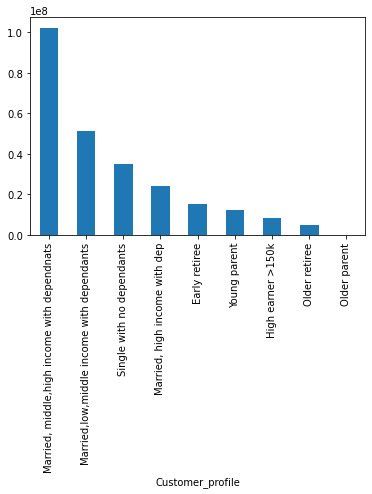

In [56]:
# Visualization and export of Revenue by customer profile
Customer_profile_sales_bar = round(merged_cust.groupby(['Customer_profile'])['prices'].agg('sum').sort_values(ascending=False),0).plot.bar()
Customer_profile_sales_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer_profile_sales_bar_1902.png'))

7. Aggregation of descriptive statistics of customer profile

In [57]:
# Aggregation of mean, max, min of Customer profile
merged_cust.groupby('Customer_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                                                 mean  min   max
Customer_profile                                                
Early retiree                                7.763784  1.0  25.0
High earner >150k                            7.935492  1.0  25.0
Married, high income with dep                7.951057  1.0  25.0
Married, middle,high income with dependnats  7.962456  1.0  25.0
Married,low,middle income with dependants    7.400645  1.0  25.0
Older parent                                 7.675362  1.1  14.8
Older retiree                                7.773877  1.0  25.0
Single with no dependants                    7.770186  1.0  25.0
Young parent                                 7.799014  1.0  25.0

8. Comparing Customer profile with variables

In [ ]:
# Comparing customer profiles with department
pivot_Customer_profile_dept = np.round(merged_cust_dept.pivot_table(index='department', columns='Customer_profile', values='prices', aggfunc='sum',margins = True,margins_name = 'Total'),0)
print(pivot_Customer_profile_dept)
pivot_Customer_profile_dept.to_clipboard()

In [70]:
# Comparing Customer profiles with regions
pivot_Customer_profile_region = np.round(merged_cust.pivot_table(index='Customer_profile', columns='Region', values='prices', aggfunc='sum',margins = True,margins_name = 'Total'),0)
print(pivot_Customer_profile_region)
pivot_Customer_profile_region.to_clipboard()

Region                                          Midwest   Northeast  \
Customer_profile                                                      
Early retiree                                 3563220.0   2719356.0   
High earner >150k                             1896779.0   1438272.0   
Married, high income with dep                 5677297.0   4179167.0   
Married, middle,high income with dependnats  23865774.0  18392815.0   
Married,low,middle income with dependants    11938705.0   8835260.0   
Older parent                                        NaN       390.0   
Older retiree                                 1168992.0    845302.0   
Single with no dependants                     8238077.0   6044476.0   
Young parent                                  2844133.0   2075068.0   
Total                                        59192978.0  44530106.0   

Region                                            South        West  \
Customer_profile                                                      
Early

9. Illustrating results with suitable charts

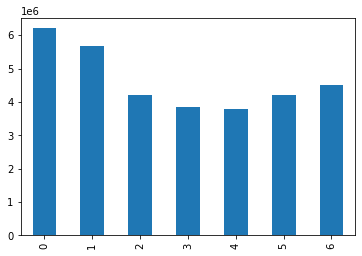

In [18]:
# Visualization and export of Days of the week'
busy_days_bar = merged_cust['order_dow'].value_counts().sort_index().plot.bar()
busy_days_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busy_days_bar.png'))

In [108]:
# Regional customer habit
crosstab_department_region = pd.crosstab(merged_cust_dept['department'], merged_cust_dept['Region'], dropna = False)
print(crosstab_department_region)

Region           Midwest  Northeast    South     West
department                                           
alcohol            36186      26542    51624    39344
babies             98983      75139   143654   106026
bakery            273869     208599   388815   301145
beverages         625574     483418   898940   680191
breakfast         163551     123574   234251   181657
bulk                8193       5802    11533     9045
canned goods      250702     186755   356015   274586
dairy eggs       1264223     954026  1796969  1383529
deli              245678     186817   349419   269335
dry goods pasta   203769     151816   287444   223598
frozen            524096     390918   747900   571829
household         175824     131485   243070   188287
international      63736      46891    89142    69484
meat seafood      166129     124620   235752   182426
missing            16535      12374    23193    17043
other               8420       6585    12212     9074
pantry            442101    

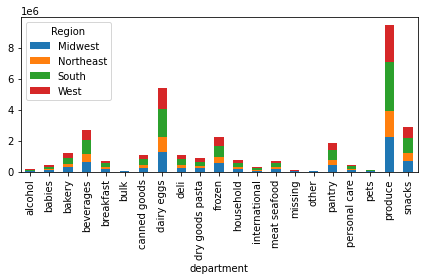

In [109]:
# Sacked bar of department & region
department_region_bar = crosstab_department_region.plot(kind = 'bar', stacked = True)
plt.tight_layout()
department_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_region_bar.png'))

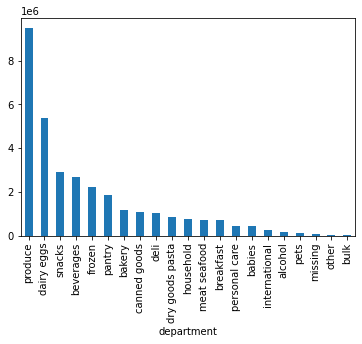

In [106]:
# Visualizing the description of department by orders
product_orders_bar = round(merged_cust_dept.groupby(['department'])['order_id'].agg('count').sort_values(ascending=False),0).plot.bar()
product_orders_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_orders_bar.png'))

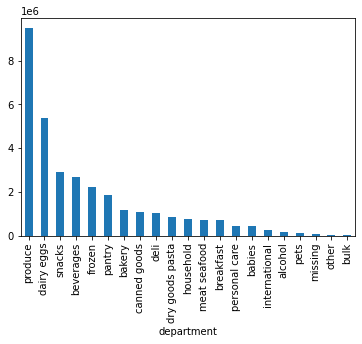

In [7]:
# Visualizing the description of department by orders
product_price_bar = round(merged_cust_dept.groupby(['department'])['prices'].agg('count').sort_values(ascending=False),0).plot.bar()
product_price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_price_bar.png'))

In [7]:
orders_wrangled = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_wrangled.csv'), index_col = False)

In [8]:
orders_wrangled.shape

(49693, 6)

In [11]:
orders_products_merge = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge.csv'), index_col = False)

In [12]:
orders_products_merge.shape

(32404859, 25)

In [21]:
df_merged_cust.shape

(32404859, 35)

In [12]:
Spending_flag = merged_cust_dept['Spending_flag'].plot.bar

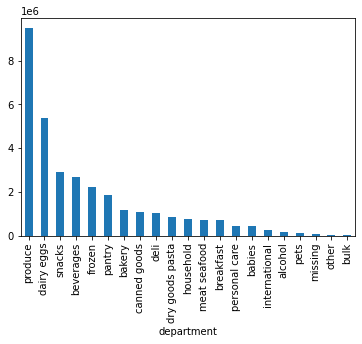

In [13]:
# Visualizing the description of department by orders
product_price_bar = round(merged_cust_dept.groupby(['department'])['prices'].agg('count').sort_values(ascending=False),0).plot.bar()
product_price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_price_bar.png'))

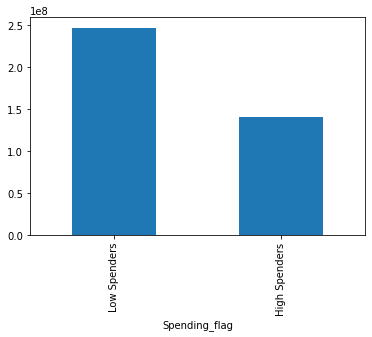

In [15]:
# Visualizing the description of Spending_flag
Spending_flag_bar = round(merged_cust_dept.groupby(['Spending_flag'])['prices'].agg('sum').sort_values(ascending=False),0).plot.bar()

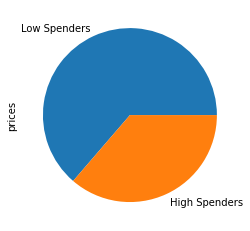

In [16]:
# Visualizing the description of Spending_flag
Spending_flag_bar = round(merged_cust_dept.groupby(['Spending_flag'])['prices'].agg('sum').sort_values(ascending=False),0).plot.pie()

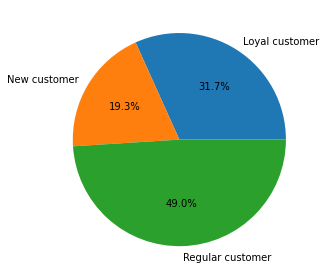

In [18]:
loyalty_pie = merged_cust_dept['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.tight_layout()

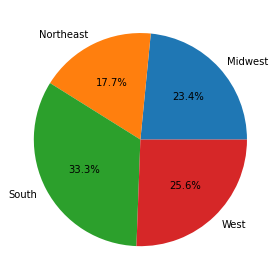

In [26]:
# Visualizing the description of Spending_flag
Regional_ordering_pie = merged_cust['Region'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.tight_layout()

In [22]:
merged_cust_dept.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,...,First_name,Surname,Gender,State,Age,date_joined,Number_of_dependants,Family_status,income,department
0,0,0,0,0,2539329,1,prior,1,2,8,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
1,1,1,1,5,2398795,1,prior,2,3,7,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
2,2,2,2,11,473747,1,prior,3,3,12,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
3,3,3,3,16,2254736,1,prior,4,4,7,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
4,4,4,4,21,431534,1,prior,5,4,15,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages


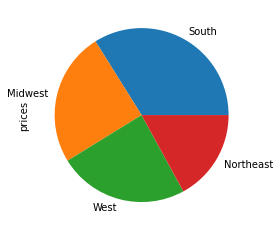

In [27]:
# Visualizing the description of Spending_flag
ordering_habit_pie = round(merged_cust.groupby(['Region'])['prices'].agg('sum').sort_values(ascending=False),0).plot.pie()

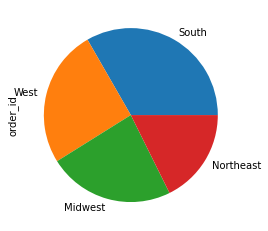

In [28]:
# Visualizing the description of Spending_flag
ordering_habit_pie = round(merged_cust.groupby(['Region'])['order_id'].agg('count').sort_values(ascending=False),0).plot.pie()

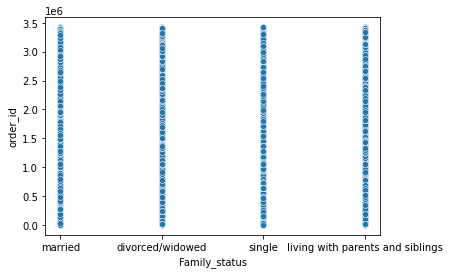

In [31]:
line_3 = sns.scatterplot(x = 'Family_status', y = 'order_id',data = merged_cust)

<AxesSubplot:>

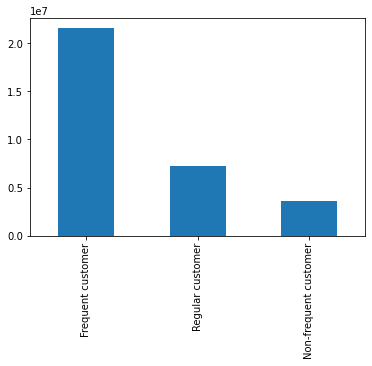

In [35]:
merged_cust['Customer_frequency_flag'].value_counts().plot.bar()